In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "/Users/jbeiting/Desktop/CS_539/Team_assignment_4"]).decode("utf8"))

MNIST_RandomForest.ipynb
mnist_rf.csv
test.csv
train.csv



In [50]:
train = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/train.csv')
test = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/test.csv')

In [51]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [52]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_x = train.iloc[:,1:]
df_y = train.iloc[:,0]

In [54]:
def print_image(row, df):
    temp = df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

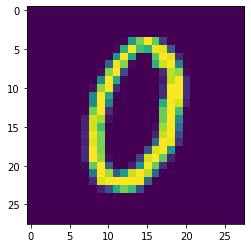

In [55]:
print_image(5, df_x)

In [56]:
# checking frequency of each number
df_y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

/Users/jbeiting/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

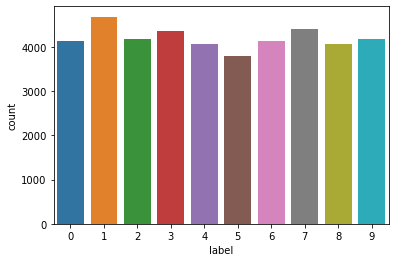

In [57]:
sns.countplot(df_y)

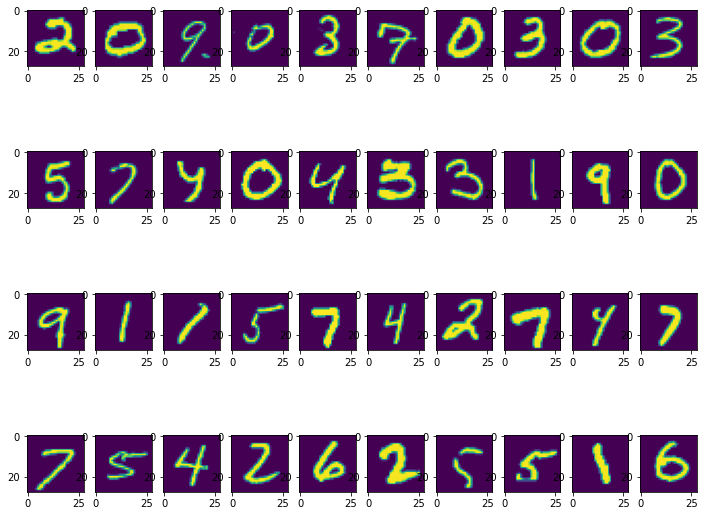

In [58]:
plt.figure(figsize = (12, 10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(i, test)

In [59]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (33600, 784)
X_test shape:  (8400, 784)


In [60]:
# training for Random Forest
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
pred = rf.predict(X_test)
print("Classification Report: \n", classification_report(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.96       860
           3       0.96      0.94      0.95       863
           4       0.97      0.96      0.96       827
           5       0.96      0.97      0.96       756
           6       0.96      0.99      0.98       841
           7       0.97      0.96      0.97       899
           8       0.95      0.95      0.95       768
           9       0.95      0.94      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Matrix: 
 [[797   0   0   0   2   1   6   0   7   0]
 [  0 948   7   1   1   1   1   0   2   0]
 [  4   1 834   4   1   0   3   6   6   1]
 [  2   2  14 810   0   9   3   8  11   4]
 [  2   2   0   0 795   

In [62]:
# Cross validation
rf.fit(df_x, df_y)
score = cross_val_score(rf, df_x, df_y)
print('Score: ', np.mean(score))

Score:  0.9644999999999999


In [63]:
pred = rf.predict(test)

In [64]:
pred = pd.Series(pred,name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv", index = False)